In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from data import Dataset

In [3]:
data = Dataset()

In [4]:
print(data.df)

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        

In [5]:
print(data.df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
outcome = 'Diabetes_012'
predictors = list(data.df.columns)
predictors.remove(outcome)

In [7]:
label_encoders = {}
for column in predictors:
    if data.df[column].dtype == 'object':
        le = LabelEncoder()
        data.df[column] = le.fit_transform(data.df[column])
        label_encoders[column] = le

In [8]:
scaler = StandardScaler()
data.df[predictors] = scaler.fit_transform(data.df[predictors])

In [9]:
x = data.df[predictors]
y = data.df[outcome]

accuracies = []

print('-' * 65)
for k in range(3, 12, 2):
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(x, y)

    predictions = kNN.predict(x)
    accuracy = accuracy_score(y, predictions)
    accuracies.append(accuracy)

    print(f'k = {k}, Точность: {accuracy:.2f}')
    for num_string in range(5):
        new_record = x.iloc[num_string:num_string+1]

        prediction = kNN.predict(new_record)
        probabilities = kNN.predict_proba(new_record)

        print(f'{num_string + 1}) Предсказание: {prediction[0]}; Вероятности: {probabilities[0]}')
    print('-' * 65)

-----------------------------------------------------------------
k = 3, Точность: 0.89
1) Предсказание: 2.0; Вероятности: [0.33333333 0.         0.66666667]
2) Предсказание: 0.0; Вероятности: [1. 0. 0.]
3) Предсказание: 0.0; Вероятности: [1. 0. 0.]
4) Предсказание: 0.0; Вероятности: [0.66666667 0.         0.33333333]
5) Предсказание: 0.0; Вероятности: [1. 0. 0.]
-----------------------------------------------------------------
k = 5, Точность: 0.87
1) Предсказание: 2.0; Вероятности: [0.2 0.2 0.6]
2) Предсказание: 0.0; Вероятности: [1. 0. 0.]
3) Предсказание: 0.0; Вероятности: [0.6 0.2 0.2]
4) Предсказание: 2.0; Вероятности: [0.4 0.  0.6]
5) Предсказание: 0.0; Вероятности: [1. 0. 0.]
-----------------------------------------------------------------
k = 7, Точность: 0.86
1) Предсказание: 2.0; Вероятности: [0.14285714 0.14285714 0.71428571]
2) Предсказание: 0.0; Вероятности: [0.85714286 0.         0.14285714]
3) Предсказание: 0.0; Вероятности: [0.42857143 0.14285714 0.42857143]
4) Предск

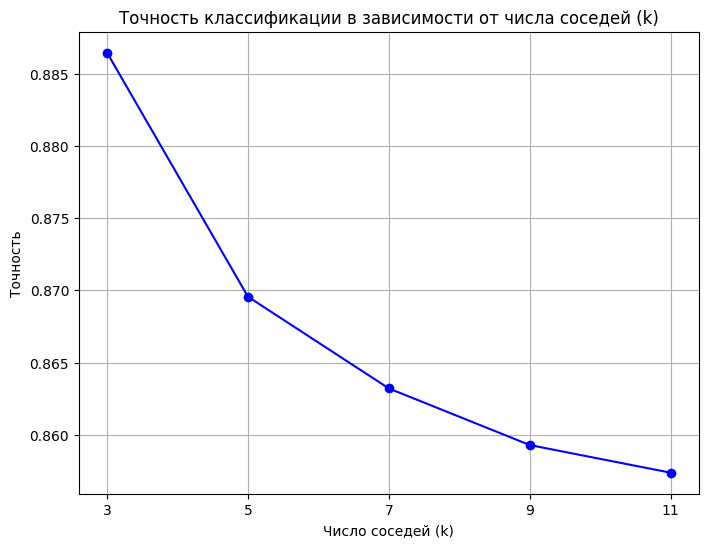

In [10]:
k_values = list(range(3, 12, 2))
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Точность классификации в зависимости от числа соседей (k)')
plt.xlabel('Число соседей (k)')
plt.ylabel('Точность')
plt.xticks(k_values)
plt.grid(True)
plt.show()